##Frequent Pattern Mining

##### This kernel is a comprehensive overview focused on the comparative analysis between Apriori ,Fpmax and Frequent Pattern Growth algorithms. These are all association rule algorithms.

###### This kernal is about frequent pattern minning of different algorithms.



####We will be covering the following topics:



###Data Preparation for association rules


###Impelementation of Assosiatoion rule

###Comparitave Analysis of Algos



In [ ]:
#Have to update version of mlxtend on Colab
import mlxtend as ml
print(ml.__version__)

0.18.0


In [ ]:
##
##import matplotlib
##matplotlib.use('Agg')

In [ ]:
#This line of code to upgrade library 
#!pip install mlxtend --upgrade

In [ ]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from prettytable import PrettyTable
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth,fpmax

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/kaggle_fun/Groceries_dataset.csv')  

In [ ]:
# looking up thats in data frame
data.head()
data.shape

(38765, 3)

In [ ]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
# Get all the transactions as a list of lists
all_transactions = [transaction[1]['itemDescription'].tolist() 
for transaction in list(data.groupby(['Member_number', 'Date']))]

In [ ]:
# Transactions in the transactional dataset
len(all_transactions)

14963

In [ ]:
# Look at the 15 first transactions
all_transactions[0:15]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns']]

In [ ]:
# The following instructions transform the dataset into the required format 
trans_encoder = TransactionEncoder() # Instanciate the encoder
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)

In [ ]:
trans_encoder_matrix.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


###Functions made 

In [ ]:
# To compute time of algorithm running time.
def perform_rule_calculation(transact_items_matrix, rule_type, min_support=0.001):
    """
    excution time for the corresponding algorithm
        
    """
    start_time = 0
    total_execution = 0

    if(rule_type=="fpmax"):
        start_time = time.time()
        rule_items = fpmax(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Fp max! ")
        print(rule_type)
        
    if(rule_type=="apriori"):
        start_time = time.time()
        rule_items =apriori(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Apriori !")
        print(rule_type)
        
    if(rule_type == "Fpgrowth"):
        start_time = time.time()
        rule_items = fpgrowth(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Fp Growth !")
        print(rule_type)
    
    rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))
    
    return rule_items, total_execution

In [ ]:
#Function for association rule
def compute_association_rule(rule_matrix, metric="lift", min_thresh=1):
    """
    Compute the final association rule
 
        rule_matrix: the corresponding algorithms matrix
        metric: the metric to be used (default is lift)
        min_thresh: the minimum threshold (default is 1)
        
    Returns
        Rules:: Information for each transaction satisfying the given metric & threshold
    """
    rules = association_rules(rule_matrix, 
                              metric=metric, 
                              min_threshold=min_thresh)
    
    return rules

In [ ]:
# Plot Lift Vs confidence

def plot_metrics_relationship(rule_matrix, col1, col2):
    """
    shows the relationship between the two input columns 
   
    """
    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1], 
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs {}'.format(col1, col2))

In [ ]:
#Comapring algorithms run time and plotting bar chart

def compare_time_exec(algo1=list, algo2=list, algo3=list):
    """
        - Algo1 list contains first algo details.
            
        - Algo2 list having the details of second algorithm
        
        - Algo3 list have the data of third algorithm
    """
    
    execution_times = [algo1[1], algo2[1], algo3[1]]
    algo_names = (algo1[0], algo2[0] , algo3[0])
    y=np.arange(len(algo_names))
    
    plt.bar(y,execution_times,color=['orange', 'blue', 'red'])
    plt.xticks(y,algo_names)
    plt.xlabel('Algorithms')
    plt.ylabel('Time')
    plt.title("Execution Time (seconds) Comparison")
    plt.show()
    print("Fianls Results")

In [ ]:
val = {'name':12}
value = list(val.items())[0]

In [ ]:
value

('name', 12)

##Fp Growth Algorithm

In [ ]:
fpgrowth_matrix, fp_growth_exec_time = perform_rule_calculation(trans_encoder_matrix, rule_type='Fpgrowth') # Run the algorithm
print("Fp Growth execution took: {} seconds".format(fp_growth_exec_time))

Computed Fp Growth !
Fpgrowth
Fp Growth execution took: 0.2103438377380371 seconds


In [ ]:
fpgrowth_matrix.head()

,support,itemsets,number_of_items
0,0.157923,(whole milk),1
1,0.085879,(yogurt),1
2,0.060349,(sausage),1
3,0.009490,(semi-finished bread),1
4,0.051728,(pastry),1


In [ ]:
fpgrowth_matrix.tail()

,support,itemsets,number_of_items
745,0.001403,"(chewing gum, yogurt)",2
746,0.001069,"(chewing gum, other vegetables)",2
747,0.001002,"(chewing gum, soda)",2
748,0.001069,"(pasta, whole milk)",2
749,0.001002,"(seasonal products, rolls/buns)",2


####lift Fpgrowth

In [ ]:
fp_growth_rule_lift = compute_association_rule(fpgrowth_matrix)

In [ ]:
fp_growth_rule_lift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(whole milk, yogurt)",(rolls/buns),0.011161,0.110005,0.001337,0.119760,1.088685,0.000109,1.011083
1,"(rolls/buns, yogurt)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701
2,"(whole milk, rolls/buns)",(yogurt),0.013968,0.085879,0.001337,0.095694,1.114293,0.000137,1.010854
3,(yogurt),"(whole milk, rolls/buns)",0.085879,0.013968,0.001337,0.015564,1.114293,0.000137,1.001622
4,(whole milk),"(rolls/buns, yogurt)",0.157923,0.007819,0.001337,0.008464,1.082428,0.000102,1.000650


####Confidence Fpgrowth

In [ ]:
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=1)
fp_growth_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


##Apriori Algorithm with execuation time

In [ ]:
apriori_matrix, apriori_exec_time = perform_rule_calculation(trans_encoder_matrix, rule_type="apriori")
print("Apriori Execution took: {} seconds".format(apriori_exec_time))

Computed Apriori !
apriori
Apriori Execution took: 3.244062662124634 seconds


In [ ]:
apriori_matrix.head()

,support,itemsets,number_of_items
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1


In [ ]:
apriori_matrix.tail()

,support,itemsets,number_of_items
745,0.001136,"(sausage, whole milk, rolls/buns)",3
746,0.001002,"(soda, whole milk, rolls/buns)",3
747,0.001337,"(yogurt, whole milk, rolls/buns)",3
748,0.001069,"(sausage, whole milk, soda)",3
749,0.001470,"(sausage, whole milk, yogurt)",3


###Lift

In [ ]:
apriori_rule_lift = compute_association_rule(apriori_matrix)

In [ ]:
apriori_rule_lift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,8.785064e-05,1.004426
1,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,8.785064e-05,1.001326
2,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012
3,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196
4,(beef),(citrus fruit),0.033950,0.053131,0.001804,0.053150,1.000349,6.297697e-07,1.000020


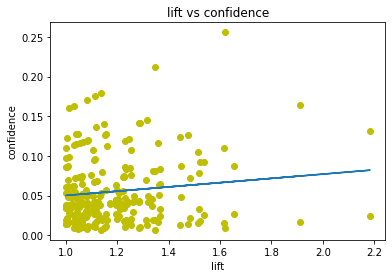

In [ ]:
plot_metrics_relationship(apriori_rule_lift, col1='lift', col2='confidence')

Confidence Apriori Algorithm

In [ ]:
apripri_rule = compute_association_rule(apriori_matrix, metric="confidence", min_thresh=0.2)
apripri_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304
1,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541


##Fpmax Algo

In [ ]:
fpmax_matrix , fpmax_exec_time = perform_rule_calculation(trans_encoder_matrix, rule_type="fpmax")
print("fpmax Execuation took: {} seconds".format(fpmax_exec_time))


Computed Fp max! 
fpmax
fpmax Execuation took: 0.42864441871643066 seconds


In [ ]:
fmax =  fpmax(trans_encoder_matrix, min_support=0.01, use_colnames=True)
fmax.head()

,support,itemsets
0,0.010025,(soft cheese)
1,0.010158,(processed cheese)
2,0.010493,(red/blush wine)
3,0.010559,(herbs)
4,0.011696,(white wine)


Comparision of algorihms time execution 

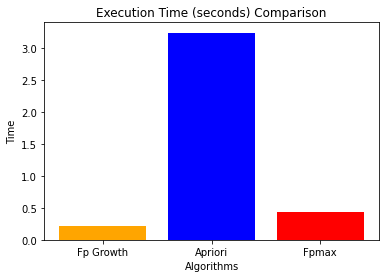

Brain Fucks


In [ ]:
algo1 = ['Fp Growth', fp_growth_exec_time]
algo2 = ['Apriori', apriori_exec_time]
algo3 = ['Fpmax', fpmax_exec_time]

compare_time_exec(algo1, algo2, algo3)